In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [3]:
# Suppress the specific DataConversionWarning
warnings.filterwarnings("ignore")
#Load Files
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv') 

In [4]:
# Drop unnecessary columns
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_passenger_ids = test_df["PassengerId"]  # Save PassengerId for final output
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [11]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# Handle missing values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True) 

In [14]:
train_df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [15]:
train_df[train_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,28.0,0,0,7.7500,Q
55,1,1,male,28.0,0,0,35.5000,S
76,0,3,male,28.0,0,0,7.8958,S
77,0,3,male,28.0,0,0,8.0500,S
87,0,3,male,28.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [18]:
label_encoder = LabelEncoder()
train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])
test_df["Sex"] = label_encoder.transform(test_df["Sex"])
train_df["Embarked"] = label_encoder.fit_transform(train_df["Embarked"])
test_df["Embarked"] = label_encoder.transform(test_df["Embarked"])

In [19]:
# Define features and target
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df  

In [20]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred_cv = cross_val_predict(model, X_train_scaled, y_train, cv=5, method="predict")
y_pred_prob = cross_val_predict(model, X_train_scaled, y_train, cv=5, method="predict_proba")[:, 1]

In [36]:
accuracy_cv = accuracy_score(y_train, y_pred_cv)
precision_cv = precision_score(y_train, y_pred_cv)
recall_cv = recall_score(y_train, y_pred_cv)
f1_cv = f1_score(y_train, y_pred_cv)
roc_auc_cv = roc_auc_score(y_train, y_pred_prob)

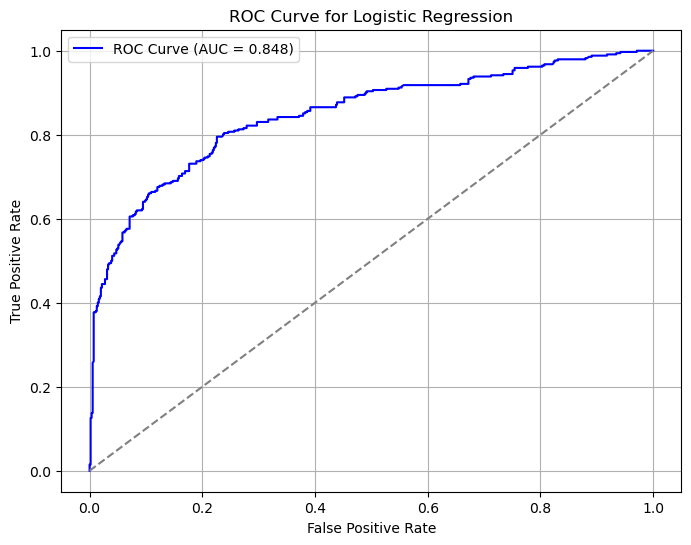

In [37]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc_cv:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()


In [38]:
accuracy_cv, precision_cv, recall_cv, f1_cv, roc_auc_cv

(0.7845117845117845,
 0.7329192546583851,
 0.6900584795321637,
 0.710843373493976,
 0.8477774582174927)